In [4]:
#  1. Load the csv file and show top 5 records from it. 
#  2. How you would be able to see each column's name. 
#  3. Show the number of rows and columns in the dataset 
#  4. Show number of players in each countries. 
#  5. Show the top 10 countries with the highest amount of players 
#  6. Create a bar plot of the top 5 countries with the highest number of players, and fill the bars in green 
#  7. Display the short name and wages for the top 5 players 
#  8. Display the short name and wages for the top 5 players with the highest salaries 
#  9. Create a bar plot of point number 8. 
#  10. Show top 10 records of Germany. 
#  11. Show the top 5 records of Germany players who have a maximum height, weight and wage 
#  12. Display the short name and wages of the top 5 Germany players 
#  13. Show top 5 players who have great shooting skills among all with short name.
#  14. Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills
#  15. Show wage records of the top 5 players of the 'Real Madrid' team
#  16. Show shooting records of top 5 players of 'Real Madrid' team
#  17. Show defending records of top 5 players of 'Real Madrid' team
#  18. Show nationality records of top 5 players of 'Real Madrid' team

things to note from the dataset

In [5]:
#year, stats do not need to be floats can convert it to an integer
#team_jersey_number to int
#nation_jersey_number
#release clause eur to usd and to float
#some of the body types are incorrect
#drop ID since there we are doing no normalization
#duplicate columns (gk_handling & goalkeeping_handling)

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from ETL import dataCleaner

1. Load the csv file and show top 5 records from it. 

In [7]:
df = dataCleaner(pd.read_csv('players_20.csv')) #run through the ETL
pd.set_option('display.max_columns', 10)
df.head()

,player_url,short_name,long_name,age,dob,...,lb,lcb,cb,rcb,rb
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,...,63+2,52+2,52+2,52+2,63+2
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,...,61+3,53+3,53+3,53+3,61+3
2,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,...,61+3,46+3,46+3,46+3,61+3
3,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,...,NaN,NaN,NaN,NaN,NaN
4,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,...,61+3,49+3,49+3,49+3,61+3


2. How you would be able to see each column's name.

In [8]:
pd.set_option('display.max_columns', None) #probably more easy all columns with pd.set_options
df.head(0)

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


3. Show the number of rows and columns in the dataset 

In [9]:
pd.set_option('display.max_rows', 10)
print(f'number of rows: {df.shape[0]}')
print(f'number of columns: {df.shape[1]}')

number of rows: 18278
number of columns: 98


4. Show number of players in each countries.

In [10]:
player_num_by_country = df.groupby(['nationality']).agg(Players=('short_name','count'))#using agg to change short_name column to players
player_num_by_country

,Players
nationality,
Afghanistan,2
Albania,43
Algeria,50
Angola,16
Antigua & Barbuda,7
...,...
Venezuela,66
Vietnam,1
Wales,117


5. Show only top 10 countries and their number of players.

In [11]:
pd.set_option('display.max_rows', 10)
player_num_by_country = player_num_by_country.sort_values('Players', ascending=False).head(10)
player_num_by_country['country'] = player_num_by_country.index #nationality is an index after a groupby this fixes it and changes to Country
player_num_by_country.reset_index(drop=True)

,Players,country
0,1667,England
1,1216,Germany
2,1035,Spain
3,984,France
4,886,Argentina
5,824,Brazil
6,732,Italy
7,591,Colombia
8,453,Japan
9,416,Netherlands


6. Create a bar plot of the top 5 countries with the highest number of players, and fill the bars in green

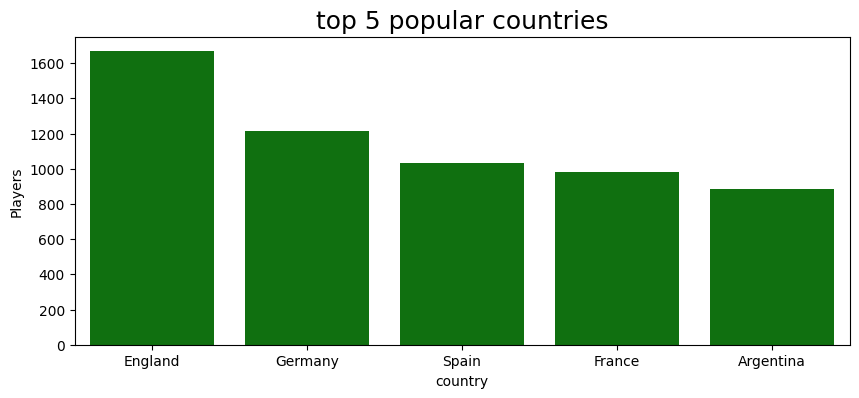

In [12]:
player_num_by_country = player_num_by_country.sort_values('Players', ascending=False).head()
player_num_by_country['country'] = player_num_by_country['country'].astype('str')#changes OBJ to str
plt.figure(figsize=(10,4))
sns.barplot(data=player_num_by_country,x='country', y='Players', color='green') #specified to be green
plt.title('top 5 popular countries', fontsize=18)
plt.show()

7. Display the short name and wages for the top 5 players 

In [13]:
names_wages = df[['short_name', 'wage_usd']] #EUR has been changed to USD
names_wages.head()

,short_name,wage_usd
0,L. Messi,616697.5
1,Cristiano Ronaldo,442057.5
2,Neymar Jr,316535.0
3,J. Oblak,136437.5
4,E. Hazard,513005.0


8. Display the short name and wages for the top 5 players with the highest salaries

In [14]:
names_wages = names_wages.sort_values('wage_usd', ascending=False).head()
names_wages

,short_name,wage_usd
0,L. Messi,616697.5
4,E. Hazard,513005.0
1,Cristiano Ronaldo,442057.5
5,K. De Bruyne,403855.0
22,A. Griezmann,403855.0


9. Create a bar plot of point number 8.

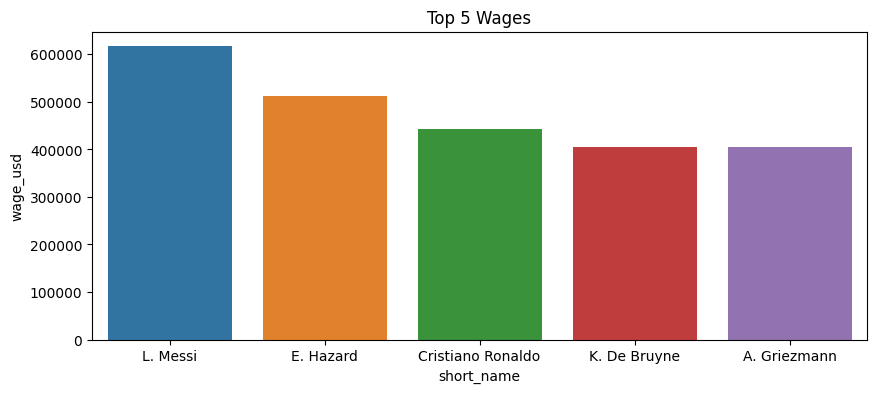

In [15]:
plt.figure(figsize=(10,4))
sns.barplot(data=names_wages,x='short_name', y='wage_usd') #no color specified for this one
plt.title('Top 5 Wages')
plt.show()

10. Show top 10 records of Germany.

In [16]:
germany_only = df[df['nationality'] == 'Germany'] #for only nationality = germany
germany_only.head(10)

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,73676250.0,272875.0,GK,Right,3,4,1,Medium/Medium,Normal,Yes,156521100.0,NaN,GK,1,NaN,2014-07-01,2022,SUB,22,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,88,85,88,90,45,88,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,88,88,34928000.0,169182.5,GK,Right,5,4,1,Medium/Medium,Normal,Yes,57631200.0,NaN,GK,1,NaN,2011-07-01,2021,GK,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,87,87,91,87,57,85,"Power Free-Kick, Flair, Swerve Pass, Acrobatic...",15,13,25,55,11,30,14,11,59,46,54,60,51,84,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,88,88,62215500.0,360195.0,CM,Right,4,5,3,Medium/Medium,Normal,Yes,127596350.0,"#Playmaker , #Crosser, #Complete Midfielder",LCM,8,NaN,2014-07-17,2023,SUB,8,45,80,90,81,70,69,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Argues with Officials, Finesse Shot, Crowd Fav...",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,88,88,61124000.0,185555.0,"CAM, LM, ST",Right,4,4,4,High/Medium,Lean,Yes,100854600.0,"#Dribbler, #Playmaker , #Distance Shooter, #F...",CAM,11,NaN,2012-07-01,2023,ST,11,85,88,84,87,45,66,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Power Free-Kick, Avoids Using Weaker Foot, Bea...",82,87,49,86,90,87,89,86,77,88,85,85,86,87,84,88,71,76,67,87,51,48,89,86,90,85,49,37,45,82+3,82+3,82+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,85+3,80+3,80+3,80+3,85+3,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,87,87,44751500.0,141895.0,CB,Right,4,3,3,High/Medium,Normal,Yes,73894550.0,"#Tackling , #Tactician",LCB,15,NaN,2019-07-01,2022,NaN,<NA>,51,58,76,72,89,76,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Avoids Using Weaker Foot, Leadership, Finesse ...",64,55,87,81,60,68,65,53,85,81,46,55,64,87,59,71,68,65,85,51,71,89,56,79,68,89,90,89,86,68+3,68+3,68+3,67+3,68+3,68+3,68+3,67+3,71+3,71+3,71+3,69+3,77+3,77+3,77+3,69+3,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3
55,https://sofifa.com/player/

11. Show the top 5 records of Germany players who have a maximum height, weight and wage 

In [17]:
top_5_german_only = germany_only.sort_values(['height_cm', 'weight_kg', 'wage_usd'], ascending=[False, False, False]).head(5)
top_5_german_only #giving the mean of the three columns put together

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
8016,https://sofifa.com/player/236831/aaron-seydel/...,A. Seydel,Aaron Seydel,23,1996-02-07,199,90,Germany,1. FSV Mainz 05,67,73,1200650.0,9823.5,"ST, LM",Left,1,4,3,Medium/Low,Normal,No,2183000.0,NaN,SUB,36,NaN,2016-11-27,2021,NaN,<NA>,68,64,53,66,29,66,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Power Free-Kick, Crowd Favourite",59,68,69,58,59,69,43,31,35,72,67,69,53,58,34,66,63,51,78,56,55,19,63,59,55,68,25,28,22,66+2,66+2,66+2,64+2,65+2,65+2,65+2,64+2,62+2,62+2,62+2,62+2,54+2,54+2,54+2,62+2,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
1389,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,76,78,7094750.0,15281.0,GK,Right,1,1,1,Medium/Medium,Stocky,No,10478400.0,NaN,SUB,13,NaN,2018-07-01,2021,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,76,75,72,77,33,74,NaN,10,13,10,26,15,16,13,11,24,19,28,37,19,72,20,54,40,35,82,12,36,21,13,42,16,58,11,17,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,77,77,6003250.0,25104.5,GK,Right,1,3,1,Medium/Medium,Normal,Yes,9605200.0,NaN,SUB,23,NaN,2017-07-01,2020,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,77,74,64,82,41,75,Flair,10,8,25,39,9,15,14,17,35,17,32,48,30,72,28,48,67,37,82,19,40,30,6,48,23,53,20,15,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13576,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,62,68,354737.5,2183.0,GK,Right,1,3,1,Medium/Medium,Stocky,No,621063.5,NaN,GK,1,NaN,2017-07-01,2021,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,59,59,57,66,22,63,NaN,13,7,13,19,5,10,11,12,25,18,20,23,18,54,19,43,27,26,83,8,32,6,6,32,15,21,7,13,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,https://sofifa.com/player/179783/ralf-fahrmann...,R. Fährmann,Ralf Fährmann,30,1988-09-27,197,98,Germany,Norwich City,80,80,10915000.0,46934.5,GK,Right,2,1,1,Medium/Medium,Normal,Yes,NaN,NaN,SUB,21,FC Schalke 04,NaN,2020,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,82,79,44,84,43,79,"Giant Throw-in, Acrobatic Clearance, Flair Passes",14,11,15,25,11,15,18,11,26,24,38,47,39,81,36,33,72,32,79,9,36,23,11,42,21,61,10,12,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


12. Display the short name and wages of the top 5 Germany players 

In [18]:
germany_only_names_wages = germany_only[['short_name', 'wage_usd']]
germany_only_names_wages.head(5)

,short_name,wage_usd
6,M. ter Stegen,272875.0
31,M. Neuer,169182.5
36,T. Kroos,360195.0
37,M. Reus,185555.0
49,M. Hummels,141895.0


13. Show top 5 players who have great shooting skills among all with short name. 

In [19]:
shooting_skills = df[['short_name', 'shooting']].sort_values('shooting', ascending=False)
shooting_skills.head()

,short_name,shooting
1,Cristiano Ronaldo,93
0,L. Messi,92
12,H. Kane,91
17,S. Agüero,90
205,F. Quagliarella,89


14. Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills

In [20]:
defending_skills = df[['short_name', 'defending', 'nationality', 'club']].sort_values('defending', ascending=False)
defending_skills.head()

,short_name,defending,nationality,club
16,G. Chiellini,90,Italy,Juventus
7,V. van Dijk,90,Netherlands,Liverpool
11,K. Koulibaly,89,Senegal,Napoli
35,D. Godín,89,Uruguay,Inter
49,M. Hummels,89,Germany,Borussia Dortmund


15. Show wage records of the top 5 players of the 'Real Madrid' team

In [21]:
real_madrid = df[df['club'] == 'Real Madrid'] #for only real madrid clubs
real_madrid_wage = real_madrid[['short_name', 'wage_usd']].sort_values('wage_usd', ascending=False)
real_madrid_wage.head()

,short_name,wage_usd
4,E. Hazard,513005.0
8,L. Modrić,371110.0
36,T. Kroos,360195.0
18,Sergio Ramos,327450.0
46,K. Benzema,311077.5


16. Show shooting records of top 5 players of 'Real Madrid' team 

In [35]:
real_madrid_shooting = real_madrid[['short_name', 'shooting']].sort_values('shooting', ascending=False)
real_madrid_shooting.head() #did not need to recast real_madrid

,short_name,shooting
100,G. Bale,87
106,J. Rodríguez,86
4,E. Hazard,83
46,K. Benzema,82
161,L. Jović,82


17. Show defending records of top 5 players of 'Real Madrid' team

In [36]:
real_madrid_defending = real_madrid[['short_name', 'defending']].sort_values('defending', ascending=False)
real_madrid_defending.head()

,short_name,defending
18,Sergio Ramos,87
42,Casemiro,85
76,R. Varane,85
94,Carvajal,82
332,Éder Militão,81


18. Show nationality records of top 5 players of 'Real Madrid' team

In [37]:
real_madrid_nationality = real_madrid[['short_name', 'nationality']].sort_values('nationality', ascending=True)
real_madrid_nationality.head()

,short_name,nationality
4,E. Hazard,Belgium
28,T. Courtois,Belgium
1256,Rodrygo,Brazil
332,Éder Militão,Brazil
2286,Lucas Silva,Brazil


Extensions

In [25]:
df_example = df
df_example = df_example.drop(columns=['player_url', 'player_tags', 'player_traits']) #dropping un-needed columns for the extensions

style formatting

In [26]:
df_currency = df_example[['value_usd', 'wage_usd', 'release_clause_usd']].head().style.format({'release_clause_usd': '${0:,.0f}','value_usd': '${0:,.0f}', 'wage_usd': '${0:,.0f}'})
df_currency

,value_usd,wage_usd,release_clause_usd
0,"$104,238,250","$616,698","$213,715,700"
1,"$63,852,750","$442,057","$105,329,750"
2,"$115,153,250","$316,535","$213,060,800"
3,"$84,591,250","$136,438","$179,770,050"
4,"$98,235,000","$513,005","$201,381,750"


- if style is saved to a variable it will cound as a 'styler' and not a 'dataframe
- you can revert the styles by using .data (Noted that I should only use .style for presenting data)

In [27]:
tester1 = df_currency.data
tester1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   value_usd           5 non-null      float64
 1   wage_usd            5 non-null      float64
 2   release_clause_usd  5 non-null      float64
dtypes: float64(3)
memory usage: 248.0 bytes


style with color

In [28]:
df_example.head().style.highlight_max(['height_cm', 'weight_kg'], color='lightblue')

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,104238250.000000,616697.500000,"RW, CF, ST",Left,5,4,4,Medium/Low,Unique,Yes,213715700.000000,RW,10,nan,2004-07-01,2021,nan,,87,92,92,96,39,66,,,,,,,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,63852750.000000,442057.500000,"ST, LW",Right,5,4,5,High/Low,Unique,Yes,105329750.000000,LW,7,nan,2018-07-10,2022,LS,7,90,93,82,89,35,78,,,,,,,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,115153250.000000,316535.000000,"LW, CAM",Right,5,5,5,High/Medium,Unique,Yes,213060800.000000,CAM,10,nan,2017-08-03,2022,LW,10,91,85,87,95,32,58,,,,,,,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,84591250.000000,136437.500000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,179770050.000000,GK,13,nan,2014-07-16,2023,GK,1,,,,,,,87,92,78,89,52,90,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,98235000.000000,513005.000000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,201381750.000000,LW,7,nan,2019-07-01,2024,LF,10,91,83,86,94,35,66,,,,,,,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


- revisiting #11
- A demonstration of style coloring and style formatting
- brown = min, blue = max

In [29]:
top_5_german_only[['short_name', 'height_cm', 'weight_kg', 'wage_usd']].style.format({"wage_usd": '${0:,.0f}'}).highlight_max(['height_cm', 'weight_kg', 'wage_usd'], color='blue').highlight_min(['height_cm', 'weight_kg', 'wage_usd'], color='brown')

,short_name,height_cm,weight_kg,wage_usd
8016,A. Seydel,199,90,"$9,824"
1389,L. Unnerstall,198,103,"$15,281"
1217,M. Esser,198,97,"$25,104"
13576,L. Watkowiak,197,103,"$2,183"
518,R. Fährmann,197,98,"$46,934"


bokeh demonstration for #9

In [30]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral5

source = ColumnDataSource(data=dict(short_name=names_wages['short_name'], wage_usd=names_wages['wage_usd'], color=Spectral5))

p = figure(x_range=names_wages['short_name'], height=350, title="Top 5 Wages")
p.vbar(x='short_name', top='wage_usd', width=0.9, color='color', legend_field="short_name", source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

- What exactly is this dataset representing?

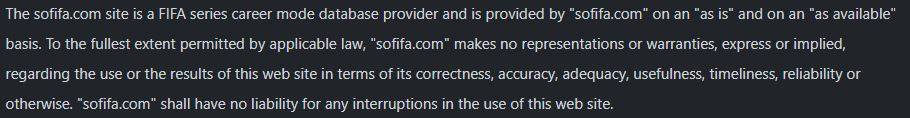

In [31]:
Image(filename='images/terms.JPG')

- Goalkeeper
- Right Full-back (or Wingback)
- Left Full-back (or Wingback)
- Center-back
- Center back (or sweeper)
- Defensive Midfielder
- Right Midfielder (or Winger)
- Center Midfielder
- Center Forward (or Striker)
- Attacking Midfielder (or Center Forward)
- Left Midfielder (or Winger)

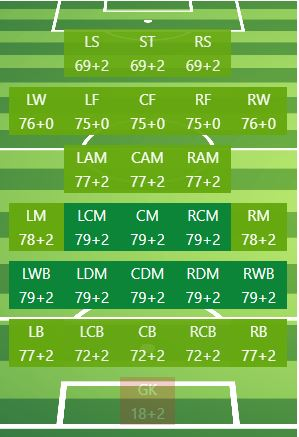

In [32]:
Image(filename='images\project1 screen show 1.JPG')

- Radar Chart for the Highest Overall Goalie

In [33]:
df_goalie = df_example[df_example['player_positions'] == 'GK'].sort_values('overall', ascending=False)
df_goalie.head(1)

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,84591250.0,136437.5,GK,Right,3,3,1,Medium/Medium,Normal,Yes,179770050.0,GK,13,NaN,2014-07-16,2023,GK,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,87,92,78,89,52,90,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


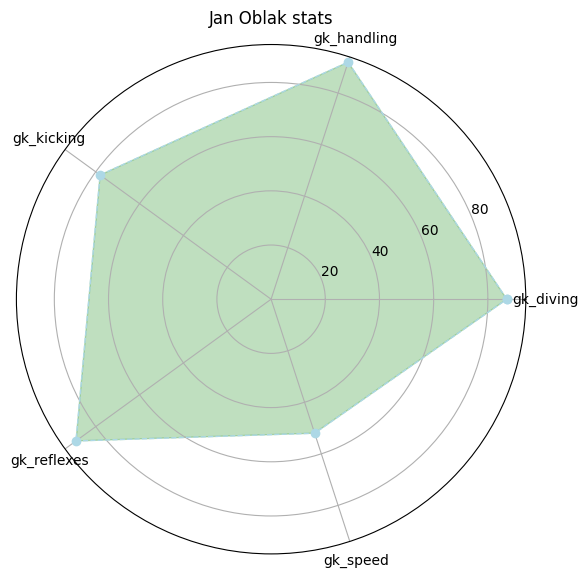

In [34]:
jan_oblak = df.iloc[3] #jan oblaks location
attributes = df.columns[36:41].to_list()


values = jan_oblak[36:41].to_list()
values += values[:1]#needed to even the shapes


angles = np.linspace(0, 2* np.pi, len(attributes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))


#creates the chart
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(polar=True)
ax.plot(angles, values, 'o--', linewidth=1, color='lightblue')
ax.fill(angles, values, alpha = 0.25, color='g')
ax.set_thetagrids([a * 180 / np.pi for a in angles[:-1]], attributes)
ax.set_title('Jan Oblak stats')
ax.grid(True)
plt.tight_layout()
plt.show()